EVENTS

In [ ]:
import pandas as pd
events = pd.read_csv('events.csv')

print(events.head())
print(events.info())


        id  user_id  sequence_number                            session_id  \
0  1889001      NaN                3  649eb2f9-4965-4b9f-9f35-931c91a59785   
1  2220610      NaN                3  25ab2d2f-1d91-499d-890c-b5c4cb8b4522   
2  1545947      NaN                3  c194df8a-19e0-4df5-9af0-5d1cc35e7165   
3  1398855      NaN                3  e240ddc0-e9f4-4749-8945-e72a9e5c39f3   
4  1668196      NaN                3  6b603097-4982-4c92-b9e4-363b5fd453a0   

                created_at     ip_address       city      state postal_code  \
0  2021-04-24 05:29:00 UTC   28.83.46.247  São Paulo  São Paulo   02675-031   
1  2020-08-30 13:33:00 UTC  42.146.37.173  São Paulo  São Paulo   02675-031   
2  2020-07-04 08:47:00 UTC    9.66.211.17  São Paulo  São Paulo   02675-031   
3  2022-07-31 10:01:00 UTC    7.81.94.186  São Paulo  São Paulo   02675-031   
4  2024-02-04 06:19:00 UTC  78.218.167.53  São Paulo  São Paulo   02675-031   

   browser traffic_source      uri event_type  
0   Safa

In [ ]:
events.head()

,id,user_id,sequence_number,session_id,created_at,ip_address,city,state,postal_code,browser,traffic_source,uri,event_type
0,1889001,NaN,3,649eb2f9-4965-4b9f-9f35-931c91a59785,2021-04-24 05:29:00 UTC,28.83.46.247,São Paulo,São Paulo,02675-031,Safari,Email,/cancel,cancel
1,2220610,NaN,3,25ab2d2f-1d91-499d-890c-b5c4cb8b4522,2020-08-30 13:33:00 UTC,42.146.37.173,São Paulo,São Paulo,02675-031,Safari,Email,/cancel,cancel
2,1545947,NaN,3,c194df8a-19e0-4df5-9af0-5d1cc35e7165,2020-07-04 08:47:00 UTC,9.66.211.17,São Paulo,São Paulo,02675-031,Firefox,Facebook,/cancel,cancel
3,1398855,NaN,3,e240ddc0-e9f4-4749-8945-e72a9e5c39f3,2022-07-31 10:01:00 UTC,7.81.94.186,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel
4,1668196,NaN,3,6b603097-4982-4c92-b9e4-363b5fd453a0,2024-02-04 06:19:00 UTC,78.218.167.53,São Paulo,São Paulo,02675-031,Chrome,Adwords,/cancel,cancel


In [ ]:
# replceing null
events['user_id'] = events['user_id'].fillna(0).astype(int)



In [ ]:
events['created_at'] = pd.to_datetime(events['created_at'], errors='coerce')

In [ ]:
null_values = events.isnull().sum()

print("Null Values:")
print(null_values)


Null Values:
id                     0
user_id                0
sequence_number        0
session_id             0
created_at         33712
ip_address             0
city               24262
state                  0
postal_code            0
browser                0
traffic_source         0
uri                    0
event_type             0
dtype: int64


In [ ]:
events = events.dropna()


In [ ]:
events.dtypes

,0
id,int64
user_id,int64
sequence_number,int64
session_id,object
created_at,"datetime64[ns, UTC]"
ip_address,object
city,object
state,object
postal_code,object
browser,object


In [ ]:
events['city'] = events['city'].fillna('unknown')

In [ ]:
events.to_csv('/content/events.csv', index=False)

In [ ]:
from google.colab import files

files.download('/content/events.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

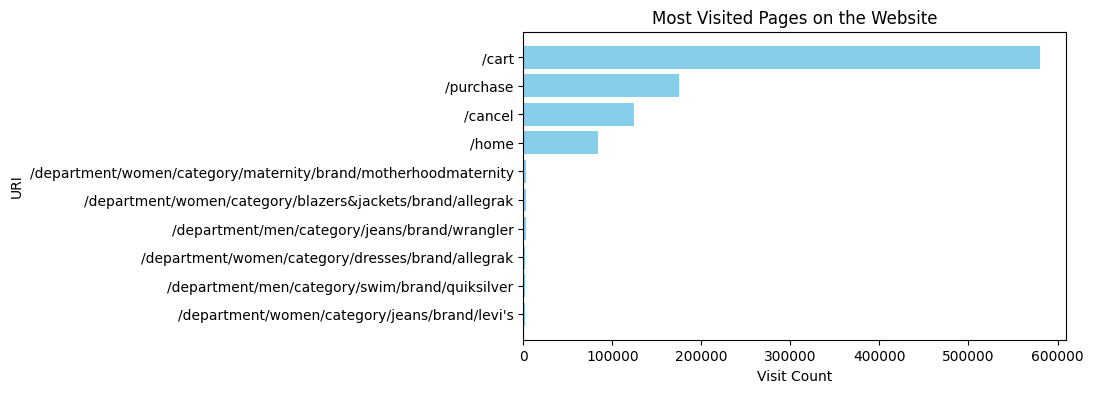

In [ ]:
import matplotlib.pyplot as plt

most_visited_pages = events['uri'].value_counts().head(10).reset_index()
most_visited_pages.columns = ['URI', 'Visit Count']

plt.figure(figsize=(7, 4))
plt.barh(most_visited_pages['URI'], most_visited_pages['Visit Count'], color='skyblue')
plt.xlabel('Visit Count')
plt.ylabel('URI')
plt.title('Most Visited Pages on the Website')
plt.gca().invert_yaxis()

plt.show()



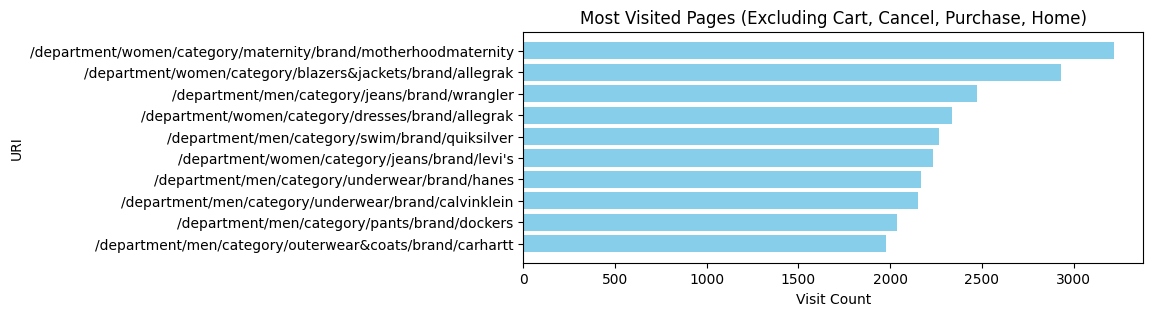

In [ ]:
filtered_visited_pages = events[~events['uri'].isin(['/cart', '/cancel', '/purchase', '/home'])]

filtered_most_visited_pages = filtered_visited_pages['uri'].value_counts().head(10).reset_index()
filtered_most_visited_pages.columns = ['URI', 'Visit Count']

import matplotlib.pyplot as plt

plt.figure(figsize=(8, 3))
plt.barh(filtered_most_visited_pages['URI'], filtered_most_visited_pages['Visit Count'], color='skyblue')
plt.xlabel('Visit Count')
plt.ylabel('URI')
plt.title('Most Visited Pages (Excluding Cart, Cancel, Purchase, Home)')
plt.gca().invert_yaxis()
plt.show()


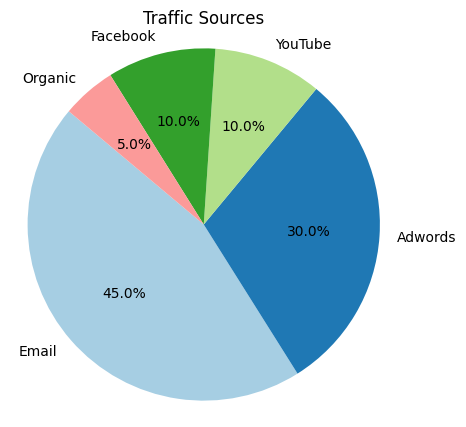

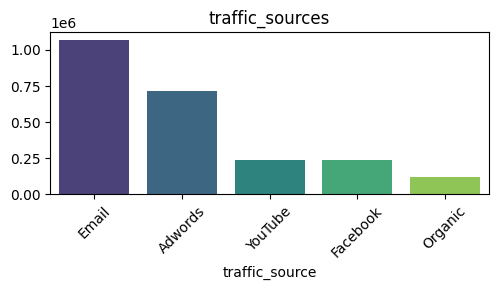

In [ ]:
traffic_sources = events['traffic_source'].value_counts().reset_index()
traffic_sources.columns = ['Traffic Source', 'Event Count']

plt.figure(figsize=(5, 5))
plt.pie(traffic_sources['Event Count'], labels=traffic_sources['Traffic Source'], autopct='%1.1f%%',
        startangle=140, colors=plt.cm.Paired.colors)
plt.title('Traffic Sources')
plt.axis('equal')
plt.show()

import matplotlib.pyplot as plt
import seaborn as sns
traffic_source_counts = events['traffic_source'].value_counts()
plt.figure(figsize=(5, 3))
sns.barplot(x=traffic_source_counts.index, y=traffic_source_counts.values,
            hue=traffic_source_counts.index, palette='viridis', dodge=False, legend=False)
plt.xlabel('traffic_source', fontsize=10)
plt.title('traffic_sources', fontsize=12)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

   Event Type   Count
0     product  827955
1  department  580835
2        cart  580418
3    purchase  175118
4      cancel  123825


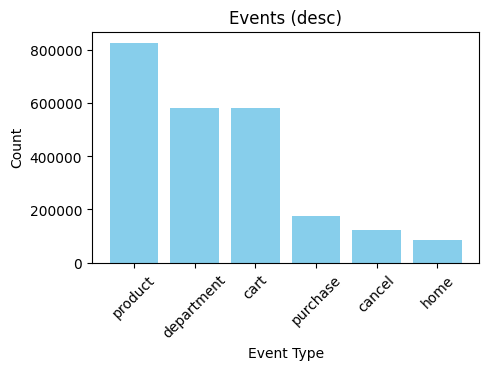

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

event_type_counts = events['event_type'].value_counts()
event_type_counts_df = event_type_counts.reset_index()
event_type_counts_df.columns = ['Event Type', 'Count']
print(event_type_counts_df.head())

plt.figure(figsize=(5, 3))
plt.bar(event_type_counts_df['Event Type'], event_type_counts_df['Count'], color='skyblue')
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.title('Events (desc)')
plt.xticks(rotation=45)
plt.show()

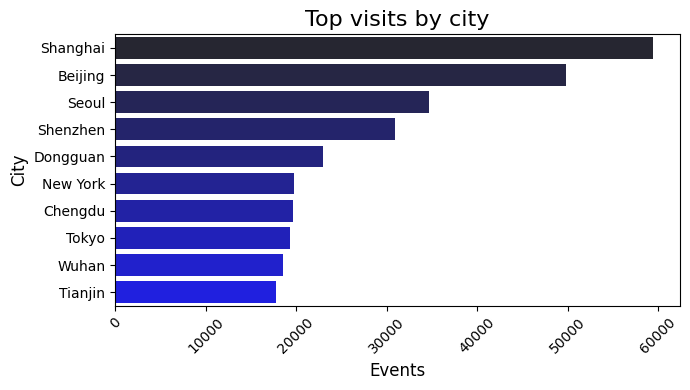

In [ ]:
city_event_counts = events['city'].value_counts().head(10)

plt.figure(figsize=(7, 4))
sns.barplot(y=city_event_counts.index, x=city_event_counts.values,
            hue=city_event_counts.index, palette='dark:Blue', dodge=False, legend=False)

plt.ylabel('City', fontsize=12)
plt.xlabel('Events', fontsize=12)
plt.title('Top visits by city', fontsize=16)

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

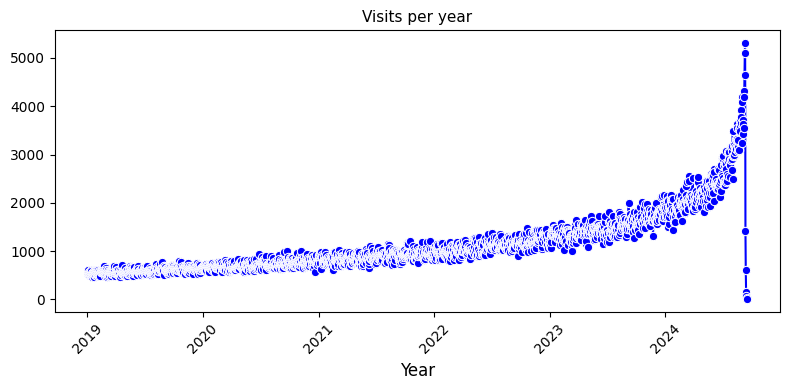

In [ ]:
events['created_at'] = pd.to_datetime(events['created_at'])

events_by_date = events['created_at'].dt.date.value_counts().sort_index()
plt.figure(figsize=(8,4))
sns.lineplot(x=events_by_date.index, y=events_by_date.values, marker='o', color='b')
plt.xlabel('Year', fontsize=12)
plt.title('Visits per year', fontsize=11)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

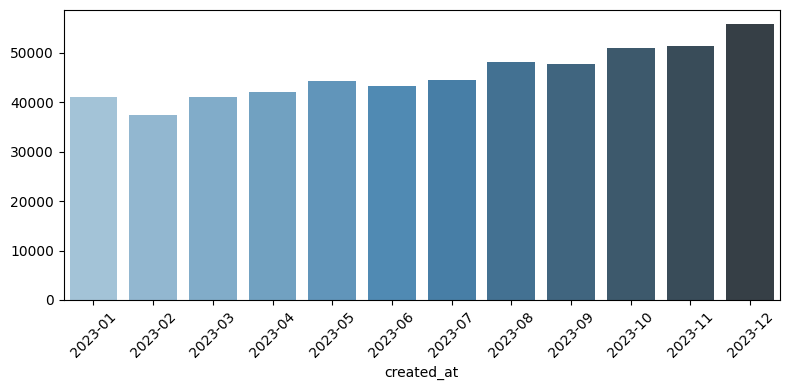

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

events['created_at'] = pd.to_datetime(events['created_at'])
events_2023 = events[events['created_at'].dt.year == 2023]
events_month_2023 = events_2023['created_at'].dt.strftime('%Y-%m').value_counts().sort_index()

plt.figure(figsize=(8, 4))
sns.barplot(x=events_month_2023.index, y=events_month_2023.values,
            hue=events_month_2023.index, palette='Blues_d', dodge=False)

plt.xticks(rotation=45)

plt.tight_layout()

plt.show()


In [ ]:
registered = events[events['user_id'] != 0].shape[0]
unregistered = events[events['user_id'] == 0].shape[0]

user_counts = pd.DataFrame({
    'User': ['Registered', 'Unregistered'],
    'Count': [registered, unregistered]
})

print(user_counts)



           User    Count
0    Registered  1257572
1  Unregistered  1114903
